# Abalone Project

## 1. Project Description

Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  

**Columns:** 

**Sex** - nominal - M, F, and I (infant)

**Length** - continuous - mm - Longest shell measurement

**Diameter** - continuous - mm - perpendicular to length

**Height** - continuous - mm - with meat in shell

**Whole weight** - continuous - grams - whole abalone

**Shucked weight** - continuous - grams - weight of meat

**Viscera weight** - continuous - grams - gut weight (after bleeding)

**Shell weight** - continuous - grams - after being dried

**Rings** - integer - +1.5 gives the age in years (target)

Необходимо предсказать возраст моллюска на основании его физических характеристик. Возраст определяется как количество колец +1,5

## 2. EDA

In [140]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [142]:
# load the data
ABALON_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv"
df = pd.read_csv(ABALON_DATASET)

##### Задание 1. Общее исследование данных

В таблице 9 столбцов и 4 177 строк

In [150]:
# проверить размеры таблицы
df.shape

(4177, 9)

In [152]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


У нас есть пропущенные значения в столцах Diameter, Whole weight, Shell weight, которые не превышают 3% от всего датасета.

In [157]:
# количество пропусков в столбцах
df.isna().sum()

Sex                0
Length             0
Diameter          99
Height             0
Whole weight      99
Shucked weight     0
Viscera weight     0
Shell weight      50
Rings              0
dtype: int64

In [159]:
# все пропуски меньше 5%
df.isnull().mean() * 100

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Rings             0.000000
dtype: float64

##### Задание 2. Однофакторный анализ

Все данные в той или иной мере напоминают нормальное распределение. В колонке Height есть выбросы.

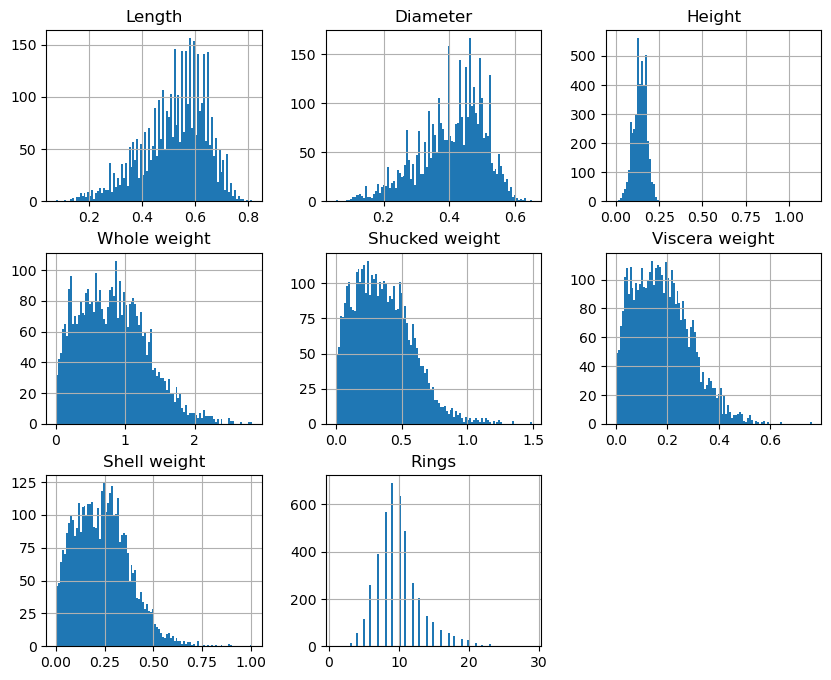

In [163]:
# по каждому столбцу посмотреть его распределение
df.hist(bins=100, figsize=(10,8));

Все пропущенные данные были заменены на медианные по колонке

In [16]:
#Если есть пропуски и ошибочные значения - обработать их. 
median_diam = df['Diameter'].median()
median_whole = df['Whole weight'].median()
median_shell = df['Shell weight'].median()
df['Diameter'].fillna(median_diam, inplace=True)
df['Whole weight'].fillna(median_whole, inplace=True)
df['Shell weight'].fillna(median_shell, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


В колонке Sex у нас есть несоответствие в регистре букв, скорректировано

In [168]:
df.Sex.unique()

array(['M', 'F', 'I', 'f'], dtype=object)

In [170]:
df['Sex']=df['Sex'].str.replace('f','F')

По-видимому, есть линейная связь между диаметром моллюска и его возрастом

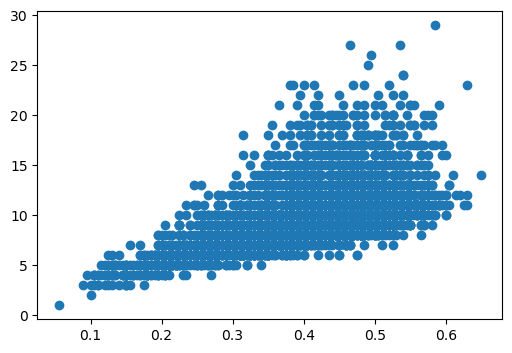

In [174]:
# Посмотреть связь с целевой переменной
plt.figure(figsize=(6,4))
plt.scatter(df.Diameter, df.Rings);

##### Задание 3. Построить матрицу корреляций

Наша целевая переменная Rings больше всего коррелирована с весом раковины. Многие физические характеристики сильно коррелированы между собой.

<Axes: >

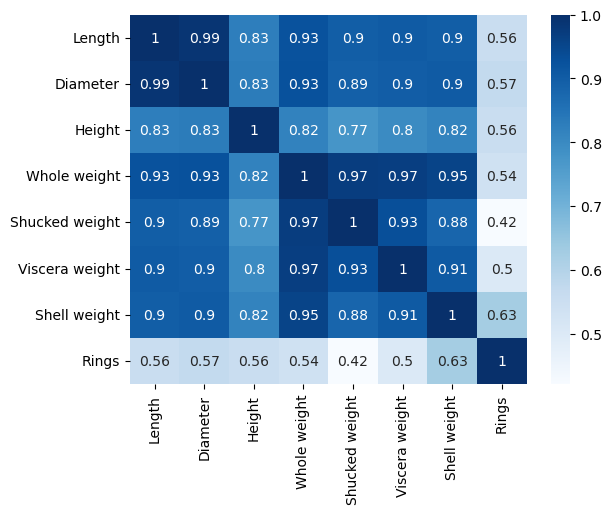

In [176]:
corr = df.corr(numeric_only=True) # матрица корреляций
sns.heatmap(corr, cmap="Blues", annot=True)

Все числовые характеристики коррелированы с полом моллюска.

In [178]:
from scipy.stats import f_oneway

In [180]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Rings,Yes


##### Задание 4. Провести анализ целевой переменной

Распределение целевой переменной похоже на нормальное распределение.
Мы видим у распределения более длинный правый хвост, который может быть трудно прогнозируем моделями (так как там мало значений).

<Axes: xlabel='Rings', ylabel='Count'>

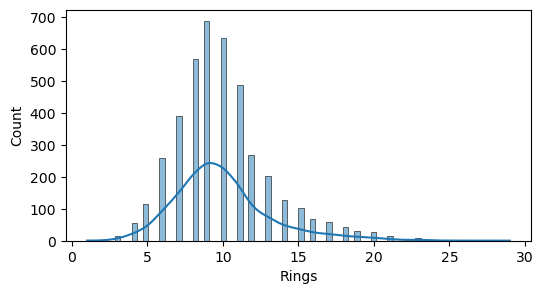

In [25]:
plt.figure(figsize=(6,3))
sns.histplot(data = df['Rings'], kde = True)

Наше распределение становится более похожим на нормальное при трансформации значений с помощью квадратичного корня.

<Axes: xlabel='Rings', ylabel='Count'>

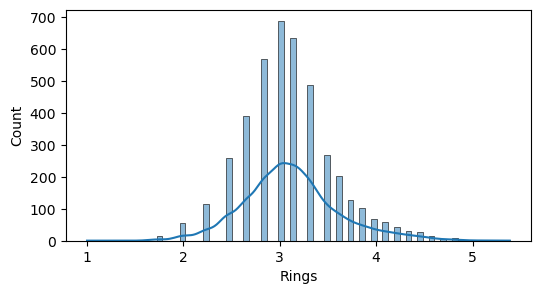

In [189]:
plt.figure(figsize=(6,3))
sns.histplot(data = np.sqrt(df['Rings']), kde = True)

##### Задание 5. Провести сравнение скорости работы Pandas и Polars на увеличенном датасете

Найдем, во сколько раз нужно увеличить датасет, чтобы получить 1000000 строк

In [119]:
1000000/df.shape[0]

239.40627244433804

In [121]:
# Увеличить размер данных простым дублированием до 1_000_000 строк в датасете
df_big = df.copy()

for i in range(230):
  df_big = pd.concat([df_big, df])

df_big.to_csv("diamonds_big.csv", index=False)

In [122]:
df_big.shape, df.shape

((964887, 9), (4177, 9))

In [123]:
!pip install polars

import polars as pl

print(pl.__version__)

0.20.31


**Загрузка данных**

При загрузке данных библиотека Polars работает в несколько раз быстрее Pandas

In [127]:
%%time
# Pandas
df_pd = pd.read_csv("diamonds_big.csv")

Wall time: 435 ms


In [129]:
%%time
# Polars
df_pl = pl.read_csv("diamonds_big.csv")

Wall time: 58.2 ms


**Фильтрация данных**

При фильтрации данных библиотека Polars работает в десятки раз быстрее Pandas

In [131]:
%%time
# Pandas
df_pd[(df_pd.Rings > 25) & (df_pd.Sex == 'M')]

Wall time: 39.6 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
294,M,0.600,0.495,0.195,1.0575,0.3840,0.190,0.375,26
2108,M,0.665,0.535,0.225,2.1835,0.7535,0.391,0.885,27
4471,M,0.600,0.495,0.195,1.0575,0.3840,0.190,0.375,26
6285,M,0.665,0.535,0.225,2.1835,0.7535,0.391,0.885,27
8648,M,0.600,0.495,0.195,1.0575,0.3840,0.190,0.375,26
...,...,...,...,...,...,...,...,...,...
954464,M,0.665,0.535,0.225,2.1835,0.7535,0.391,0.885,27
956827,M,0.600,0.495,0.195,1.0575,0.3840,0.190,0.375,26
958641,M,0.665,0.535,0.225,2.1835,0.7535,0.391,0.885,27
961004,M,0.600,0.495,0.195,1.0575,0.3840,0.190,0.375,26


In [133]:
%%time
# Polars
df_pl.filter((pl.col('Rings') >25) & (pl.col('Sex') == 'M'))

Wall time: 2.99 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.6,0.495,0.195,1.0575,0.384,0.19,0.375,26
"""M""",0.665,0.535,0.225,2.1835,0.7535,0.391,0.885,27
"""M""",0.6,0.495,0.195,1.0575,0.384,0.19,0.375,26
"""M""",0.665,0.535,0.225,2.1835,0.7535,0.391,0.885,27
"""M""",0.6,0.495,0.195,1.0575,0.384,0.19,0.375,26
…,…,…,…,…,…,…,…,…
"""M""",0.665,0.535,0.225,2.1835,0.7535,0.391,0.885,27
"""M""",0.6,0.495,0.195,1.0575,0.384,0.19,0.375,26
"""M""",0.665,0.535,0.225,2.1835,0.7535,0.391,0.885,27


**Агрегация данных**

При агрегации данных библиотека Polars работает немного быстрее Pandas

In [135]:
%%time
# Pandas
df_pd.groupby('Sex').agg({'Rings' : 'median', 'Diameter' : 'mean'})

Wall time: 43.6 ms


,Rings,Diameter
Sex,,
F,10.0,0.448652
I,8.0,0.328382
M,10.0,0.438072


In [137]:
%%time
# Polars
df_pl.groupby('Sex').agg([pl.median('Rings'), pl.mean('Diameter')])

Wall time: 37.6 ms


Sex,Rings,Diameter
str,f64,f64
"""F""",10.0,0.448652
"""I""",8.0,0.328382
"""M""",10.0,0.438072
